<a href="https://colab.research.google.com/github/Ainmimdal/DSA/blob/main/Runtime_PerformHeapsort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Text(value='3, 1, 6, 5, 2, 4', description='Input Sequence:', style=DescriptionStyle(description_width='initia…

Button(description='Perform Heapsort', style=ButtonStyle())

Min-Heap before Heapsort:


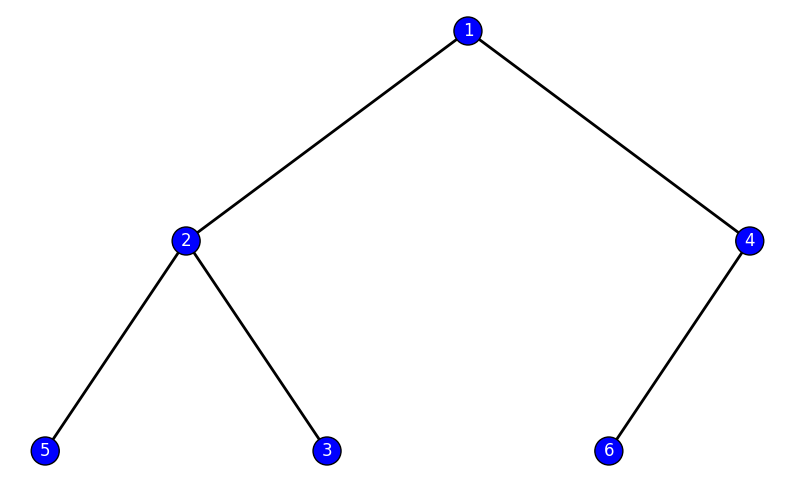

Sorted array (ascending): [1, 2, 3, 4, 5, 6]

Members' Names and Matric Numbers:
Name: Member 1, Matric 1
Name: Member 2, Matric 2
Name: Member 3, Matric 3
Name: Member 4, Matric 4


In [2]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np

# Min-Heapify function
def min_heapify(arr, n, i):
    smallest = i
    left = 2 * i + 1
    right = 2 * i + 2

    if left < n and arr[left] < arr[smallest]:
        smallest = left
    if right < n and arr[right] < arr[smallest]:
        smallest = right
    if smallest != i:
        arr[i], arr[smallest] = arr[smallest], arr[i]
        min_heapify(arr, n, smallest)

# Build min-heap from input list
def build_min_heap(arr):
    n = len(arr)
    for i in range(n // 2 - 1, -1, -1):
        min_heapify(arr, n, i)

# HeapSort function
def heap_sort(arr):
    n = len(arr)
    build_min_heap(arr)  # First build the min-heap
    for i in range(n - 1, 0, -1):
        arr[0], arr[i] = arr[i], arr[0]  # Swap the root(min element) with the last element
        min_heapify(arr, i, 0)  # Min-heapify the reduced heap
    arr.reverse()

# Function to visualize the binary tree (heap)
def plot_heap(heap):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.axis('off')

    if not heap:
        ax.text(0.5, 0.5, 'Heap is empty', horizontalalignment='center', verticalalignment='center', fontsize=12)
        plt.show()
        return

    def plot_node(ax, position, value, level, index, width=10):
        ax.text(position[0], position[1], str(value), horizontalalignment='center', verticalalignment='center', fontsize=12, color='white', bbox=dict(facecolor='blue', edgecolor='black', boxstyle="circle,pad=0.3"))
        if 2*index+1 < len(heap):  # Left child
            left_pos = (position[0] - width / 2, position[1] - 1)
            ax.plot([position[0], left_pos[0]], [position[1], left_pos[1]], 'k-', lw=2)
            plot_node(ax, left_pos, heap[2*index+1], level+1, 2*index+1, width / 2)
        if 2*index+2 < len(heap):  # Right child
            right_pos = (position[0] + width / 2, position[1] - 1)
            ax.plot([position[0], right_pos[0]], [position[1], right_pos[1]], 'k-', lw=2)
            plot_node(ax, right_pos, heap[2*index+2], level+1, 2*index+2, width / 2)

    plot_node(ax, (0.5, 0), heap[0], 0, 0, width=10)
    plt.show()

# Displaying Members' Names and Matric Numbers
def display_members():
    members = [
        ("Imad", "2127923"),
        ("Hakimi", "2213091"),
        ("Member 3", "Matric 3"),
        ("Member 4", "Matric 4"),
        # Add more members as needed
    ]
    print("\nMembers' Names and Matric Numbers:")
    for member in members:
        print(f"Name: {member[0]}, {member[1]}")

# GUI Function to perform heapsort
def heapsort_gui(input_sequence):
    try:
        # Parse input sequence
        arr = list(map(int, input_sequence.split(',')))
    except ValueError:
        print("Please enter a valid list of integers separated by commas.")
        return

    # Show the binary tree representation of the min-heap
    print("Min-Heap before Heapsort:")
    heap = arr.copy()
    build_min_heap(heap)  # Create the min-heap from input sequence
    plot_heap(heap)  # Visualize the heap as a binary tree

    # Perform heapsort
    heap_sort(arr)
    print(f"Sorted array (ascending): {arr}")

    # Display members' names and matric numbers after sorting
    display_members()

# Interactive widget
input_box = widgets.Text(value='3, 1, 6, 5, 2, 4', description='Input Sequence:', style={'description_width': 'initial'})
button = widgets.Button(description="Perform Heapsort")
button.on_click(lambda x: heapsort_gui(input_box.value))

display(input_box, button)


| Line Number | Original Code (Error)  | Rectified Code | Explanation |
|---|---|---|---|
| 10 | if left < n and arr[left] > arr[smallest]: | if left < n and arr[left] < arr[smallest]: | Corrected comparison for min-heap (left child should be smaller than root). |
| 12 | if right < n and arr[right] > arr[smallest]: | if right < n and arr[right] < arr[smallest]: | Corrected comparison for min-heap (right child should be smaller than root). |
| 24 | - | Added arr.reverse() at the end of heap_sort. | Reverses the array to produce ascending order after sorting. |